# Sales Analysis

### Dune is a reputable global retailer offering a diverse selection of products, including accessories, clothing, and phones. With a growing presence in 14 countries and a team of over 70,000 employees, the company prides itself on providing affordable options for everyone. From fashion-forward trendsetters to multi-generational families, Dune strives to offer great quality essentials and standout styles that cater to a wide range of customers.

### I was tasked to analyze the company's sales data from the previous year and provide actionable insights and recommendations. This analysis will help identify areas of opportunity and inform future business decisions aimed at improving performance and increasing profitability.


# Exploratory Data Analysis

### **Approach:** I used Exploratory Data Analysis (EDA) to analyse and summarise the data to gain insights and understanding of the underlying patterns and relationships. The main objective of EDA is to identify and explore the main characteristics and patterns of the data, and to identify any anomalies or outliers that may impact subsequent analysis.
### The EDA approach typically involved several steps, including
### 1.	**Data cleaning** - Data cleaning involves removing or correcting any errors or inconsistencies in the data, such as missing values or incorrect values.
### 2.	**Data visualization** - Data visualization techniques are used to graphically represent the data and identify any trends or patterns.
### 3.	**Statistical analysis** - Statistical analysis is used to identify any relationships between variables and to test hypotheses about the data. This may involve calculating summary statistics such as mean and standard deviation, and performing tests such as correlation analysis and hypothesis testing.


In [87]:
# Import libraries
import pandas as pd # Used for data preprocessing
import matplotlib.pyplot as plt # Used for data visualization
import seaborn as sns  # Used for data visualization
import missingno as msno  # Used for missing data and data visualization
from collections import Counter # Used for counting

In [2]:
# Load the dataset

df = pd.read_csv("C:\\Users\\iheom\\Downloads\\Dune Sales Data.csv")

In [3]:
# Print the top 5 rows
df.head()

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
0,19-Feb-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.00,109.00
1,20-Feb-16,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.50,28.50
2,27-Feb-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,3.67,5.00
3,12-Mar-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,2.0,87.50,116.50
4,12-Mar-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,35.00,41.67


In [4]:
# Print the bottom 5 rows
df.tail()

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
34862,7-Feb-16,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,2.0,1160.0,985.50
34863,13-Mar-15,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,1.0,2049.0,1583.00
34864,5-Apr-15,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,3.0,683.0,560.67
34865,30-Aug-15,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,1.0,2320.0,1568.00
34866,NaN,NaN,NaN,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Dimensionality of data - The number of rows and columns (To explore the shape of the data, ie, how does the data look like)
df.shape

(34867, 12)

In [6]:
# Shows 34867 rows of data and 12 columns

In [7]:
# Examine the columns or features of the data
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price'],
      dtype='object')

In [8]:
# Investigate the dataset for anomalies and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              34866 non-null  object 
 1   Customer          34866 non-null  object 
 2   Sales Person      34866 non-null  object 
 3   Customer_Age      34867 non-null  int64  
 4   Customer_Gender   34866 non-null  object 
 5   State             34866 non-null  object 
 6   Product_Category  34866 non-null  object 
 7   Sub_Category      34866 non-null  object 
 8   Payment Option    34866 non-null  object 
 9   Quantity          34866 non-null  float64
 10  Unit_Cost         34866 non-null  float64
 11  Unit_Price        34866 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 3.2+ MB


In [9]:
# Numerical Statistical Analysis
df. describe()

,Customer_Age,Quantity,Unit_Cost,Unit_Price
count,34867.000000,34866.000000,34866.000000,34866.000000
mean,36.382683,2.002524,349.880567,389.232473
std,11.112813,0.813936,490.015846,525.319097
min,17.000000,1.000000,0.670000,0.670000
25%,28.000000,1.000000,45.000000,53.670000
50%,35.000000,2.000000,150.000000,179.000000
75%,44.000000,3.000000,455.000000,521.000000
max,87.000000,3.000000,3240.000000,5082.000000


In [10]:
# Categorical Statistical Analysis
df.describe(include=["object", "bool"])

,Date,Customer,Sales Person,Customer_Gender,State,Product_Category,Sub_Category,Payment Option
count,34866,34866,34866,34866,34866,34866,34866,34866
unique,576,4,7,2,36,3,17,3
top,1-Mar-16,Low,Remota,F,Lagos,Accessories,Keyboard,Cash
freq,196,13041,6667,17439,10332,22534,11112,15911


# Dealing with missing data -

### 1. MCAR (Missing completely at random): These are values that are randomly missing and do not depend on any other values.

### 2. MAR (Missing at random): These values are dependent on some additional features.

### 3. MNAR (Missing not at random): There is a reason behind why these values are missing.

### There are several methods for imputing missing data, including the measure of Central Tendency, regression imputation, and multiple imputation. measure of Central Tendency involves replacing missing values with either the Mean, Median and Mode of the variable, while regression imputation involves using other variables in the dataset to predict missing values.

In [11]:
# Investigate the missing values
null_vals = df.isnull().sum()
null_vals

Date                1
Customer            1
Sales Person        1
Customer_Age        0
Customer_Gender     1
State               1
Product_Category    1
Sub_Category        1
Payment Option      1
Quantity            1
Unit_Cost           1
Unit_Price          1
dtype: int64

<Axes: >

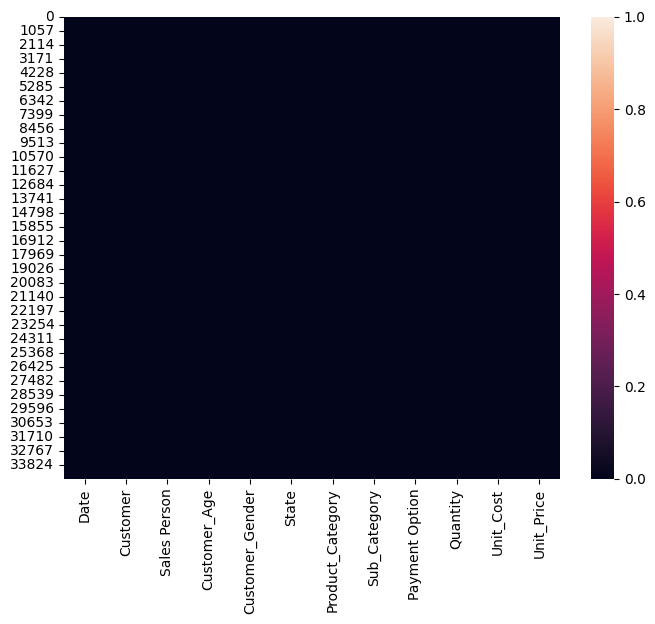

In [12]:
# Visualise the missing data
plt.figure(figsize = (8, 6))
sns.heatmap(df.isnull(), cbar=True, color="purple")

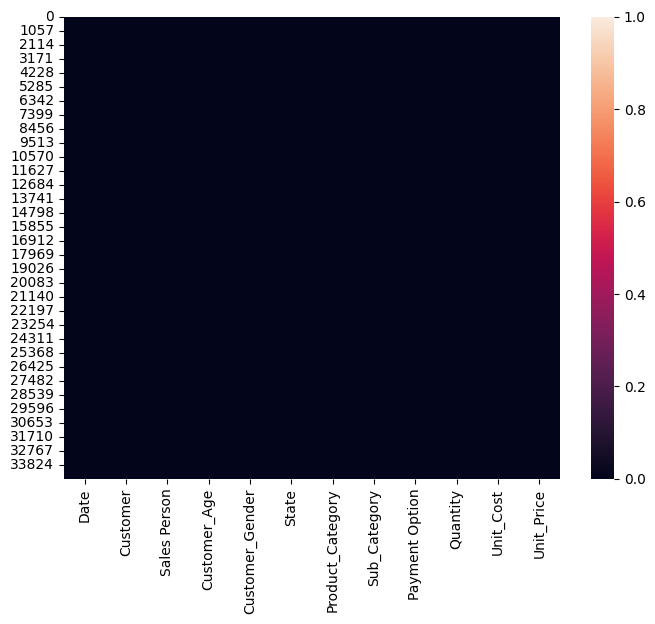

In [13]:
# Visualise the missing data and remove the axes at the top of the heatmap, add a semicolon at the end of your code
plt.figure(figsize = (8, 6))
sns.heatmap(df.isnull(), cbar=True, color="purple");

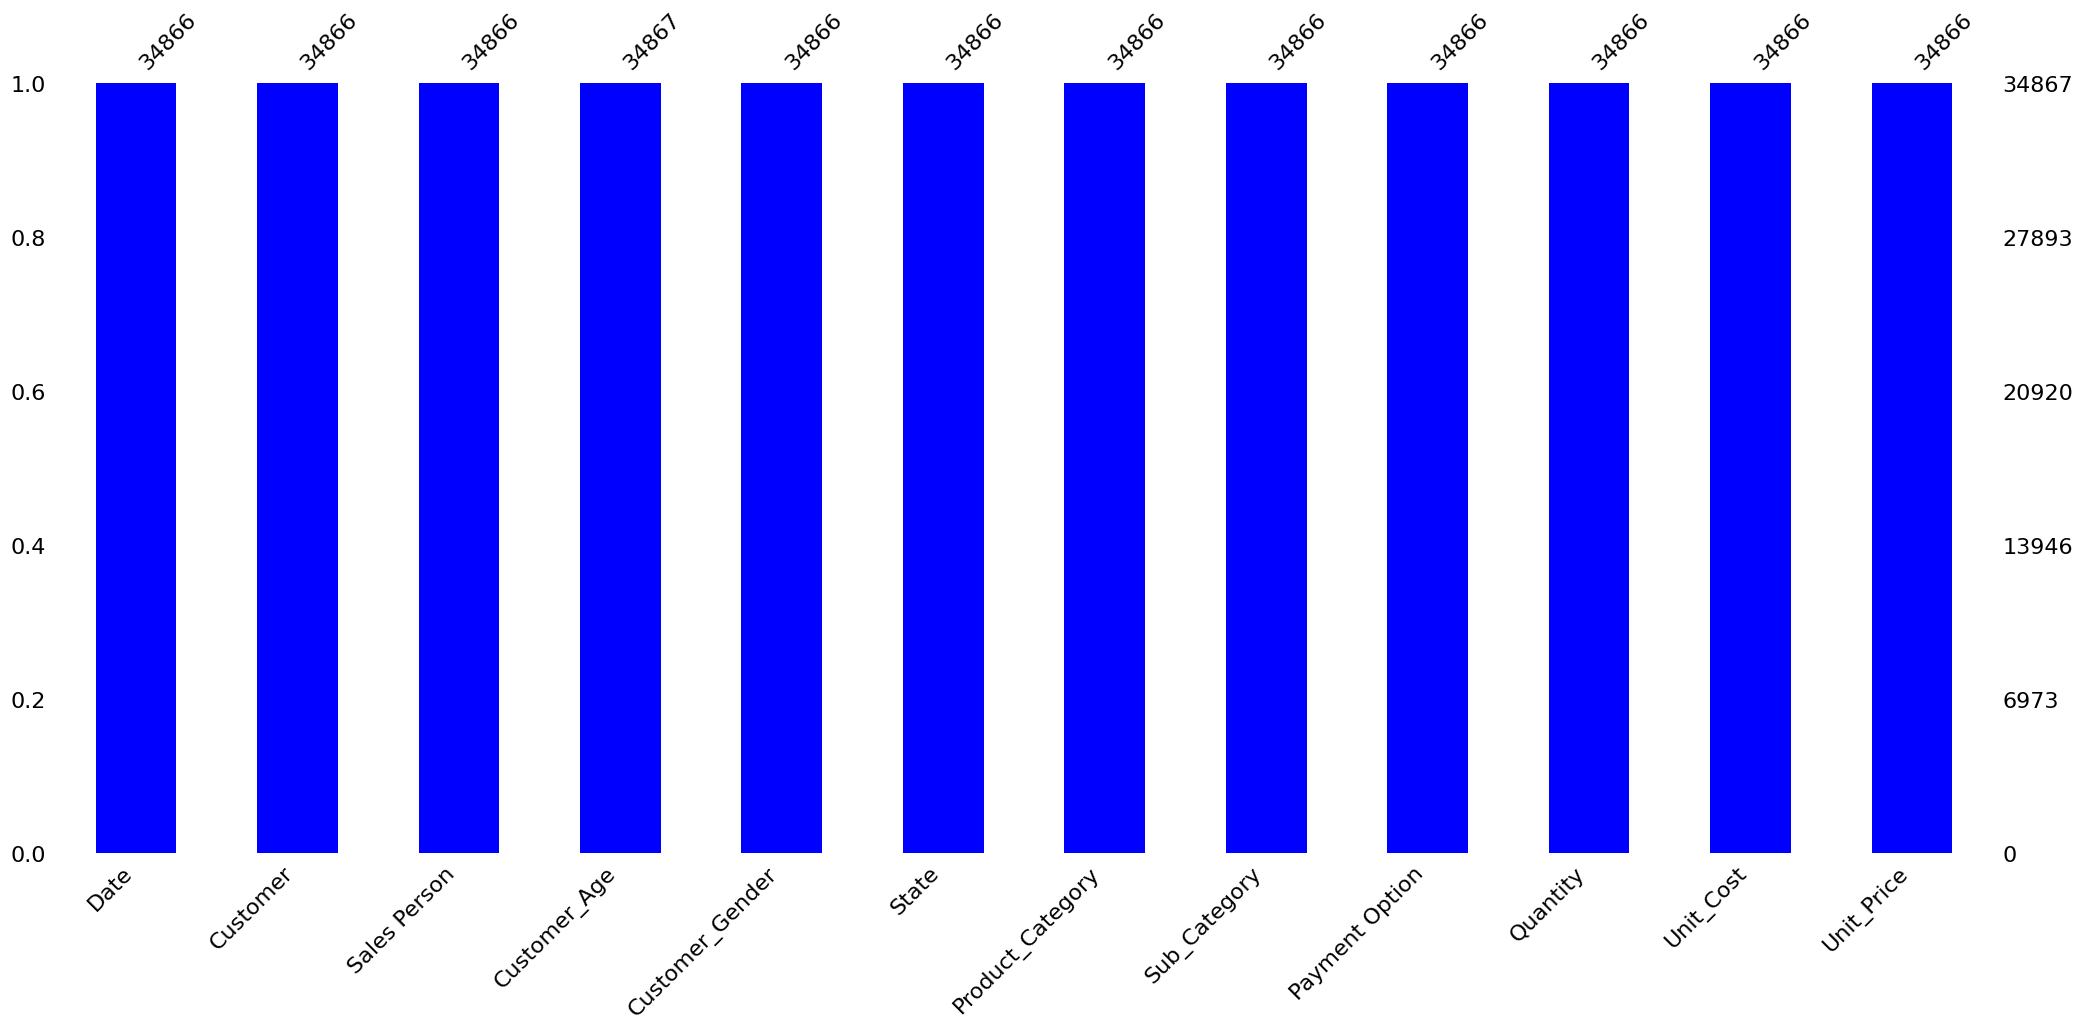

In [14]:
# Visualizing missing data using missinnog
msno.bar(df, color="blue");

In [15]:
# Display where the missing data exists in the dataset
df.isnull()

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
34862,False,False,False,False,False,False,False,False,False,False,False,False
34863,False,False,False,False,False,False,False,False,False,False,False,False
34864,False,False,False,False,False,False,False,False,False,False,False,False
34865,False,False,False,False,False,False,False,False,False,False,False,False


In [16]:
df[df.isnull().any(axis=1)]

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
34866,NaN,NaN,NaN,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Dropping the missing data
df.dropna(inplace=True)

In [18]:
df.isnull().sum()

Date                0
Customer            0
Sales Person        0
Customer_Age        0
Customer_Gender     0
State               0
Product_Category    0
Sub_Category        0
Payment Option      0
Quantity            0
Unit_Cost           0
Unit_Price          0
dtype: int64

In [19]:
# Datetime Analysis
df.head(2)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
0,19-Feb-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.0,109.0
1,20-Feb-16,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.5,28.5


In [20]:
# Convert the date column into pandas datetime object
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34866 entries, 0 to 34865
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              34866 non-null  object 
 1   Customer          34866 non-null  object 
 2   Sales Person      34866 non-null  object 
 3   Customer_Age      34866 non-null  int64  
 4   Customer_Gender   34866 non-null  object 
 5   State             34866 non-null  object 
 6   Product_Category  34866 non-null  object 
 7   Sub_Category      34866 non-null  object 
 8   Payment Option    34866 non-null  object 
 9   Quantity          34866 non-null  float64
 10  Unit_Cost         34866 non-null  float64
 11  Unit_Price        34866 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 3.5+ MB


In [21]:
df["Date"] = pd.to_datetime(df["Date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34866 entries, 0 to 34865
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              34866 non-null  datetime64[ns]
 1   Customer          34866 non-null  object        
 2   Sales Person      34866 non-null  object        
 3   Customer_Age      34866 non-null  int64         
 4   Customer_Gender   34866 non-null  object        
 5   State             34866 non-null  object        
 6   Product_Category  34866 non-null  object        
 7   Sub_Category      34866 non-null  object        
 8   Payment Option    34866 non-null  object        
 9   Quantity          34866 non-null  float64       
 10  Unit_Cost         34866 non-null  float64       
 11  Unit_Price        34866 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(7)
memory usage: 3.5+ MB


C:\Users\iheom\AppData\Local\Temp\ipykernel_17472\1130716863.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"])


In [22]:
# Extract the Year, Month and Quarter
df["year"] = df["Date"].dt.year
df["month"] = df["Date"].dt.month
df["month_name"] = df["Date"].dt.month_name()
df["quarter"] = df["Date"].dt.quarter

df.head(2)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price,year,month,month_name,quarter
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.0,109.0,2016,2,February,1
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.5,28.5,2016,2,February,1


In [23]:
# Categorising the customer age (grouping customer age)
def age_group(x):
    if x <= 25:
        return "<= 25 Young Adult"
    elif x <= 40:
        return "25-40 Adult"
    elif x <= 50:
        return "41-50 Old Adult"
    else:
        return ">= 51 Elders"

# Apply function to the data
df["age_group"] = df["Customer_Age"].apply(age_group)
df.head(2)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price,year,month,month_name,quarter,age_group
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.0,109.0,2016,2,February,1,25-40 Adult
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.5,28.5,2016,2,February,1,25-40 Adult


In [24]:
# Cost, Revenue and Profit Calculation
df["cost"] = df["Quantity"]*df["Unit_Cost"]
df["revenue"] = df["Quantity"]*df["Unit_Price"]
df["profit"] = df["revenue"] - df["cost"]

df.head(2)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price,year,month,month_name,quarter,age_group,cost,revenue,profit
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.0,109.0,2016,2,February,1,25-40 Adult,80.0,109.0,29.0
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.5,28.5,2016,2,February,1,25-40 Adult,49.0,57.0,8.0


In [25]:
# Profit/Loss grouping (profit or loss (porl))
def porl(x):
    if x >= 0:
        return "Profit"
    else:
        return "Loss"

df["profit_label"] = df["profit"].apply(porl)
df.head(2)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,...,Unit_Price,year,month,month_name,quarter,age_group,cost,revenue,profit,profit_label
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,...,109.0,2016,2,February,1,25-40 Adult,80.0,109.0,29.0,Profit
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,...,28.5,2016,2,February,1,25-40 Adult,49.0,57.0,8.0,Profit


# Univariate Analysis

### Univariate analysis involves analyzing the distribution and summary statistics of individual variables/Column/feature.
### - Numerical Column/Feature = Numerical Visualization Techniques
### - Categorical Column/Feature = Categorical Visualization Techniques

In [26]:
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price', 'year', 'month', 'month_name',
       'quarter', 'age_group', 'cost', 'revenue', 'profit', 'profit_label'],
      dtype='object')

###  Categorical data Visualization 

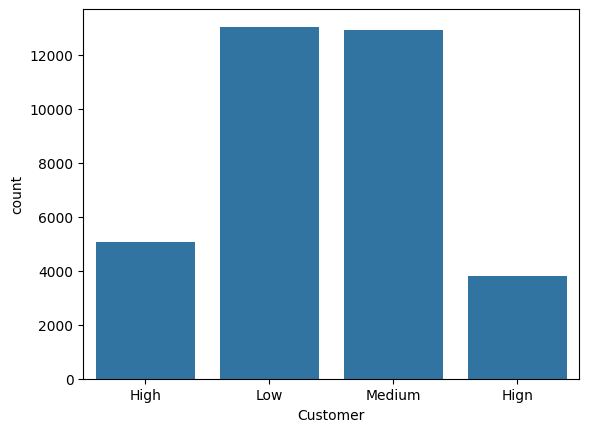

In [27]:
# How many customers belong to each customer spec
sns.countplot(x="Customer", data=df);

In [28]:
# Investigate the columns affected
df[df["Customer"] =="Hign"].head(3)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,...,Unit_Price,year,month,month_name,quarter,age_group,cost,revenue,profit,profit_label
29770,2015-08-03,Hign,Derick,28,F,Lagos,Phones,IPhone,Cash,1.0,...,2136.00,2015,8,August,3,25-40 Adult,2295.00,2136.00,-159.0,Loss
29771,2015-08-04,Hign,Derick,28,F,Lagos,Accessories,Keyboard,Cash,2.0,...,19.50,2015,8,August,3,25-40 Adult,35.00,39.00,4.0,Profit
29772,2015-08-04,Hign,Derick,28,F,Lagos,Accessories,Keyboard,Cash,3.0,...,18.67,2015,8,August,3,25-40 Adult,50.01,56.01,6.0,Profit


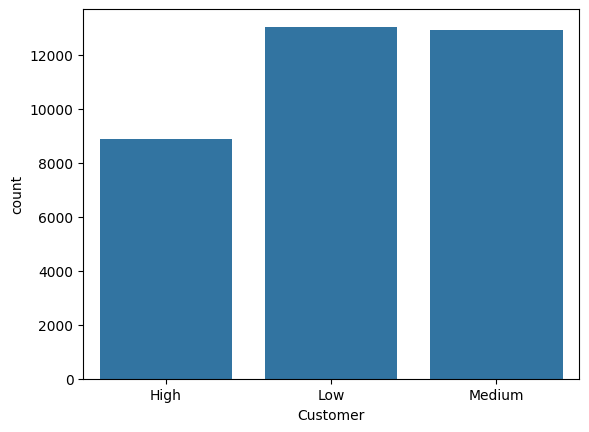

In [29]:
# Correct spelling of hign
df.loc[df["Customer"] =="Hign", "Customer"] = "High"

sns.countplot(x="Customer", data=df);

In [30]:
df["Customer"] = df["Customer"].replace("Hign", "High")

In [31]:
df["Customer"].value_counts()

Customer
Low       13041
Medium    12926
High       8899
Name: count, dtype: int64

Text(0.5, 1.0, 'Customer Category Count (Cleaned)')

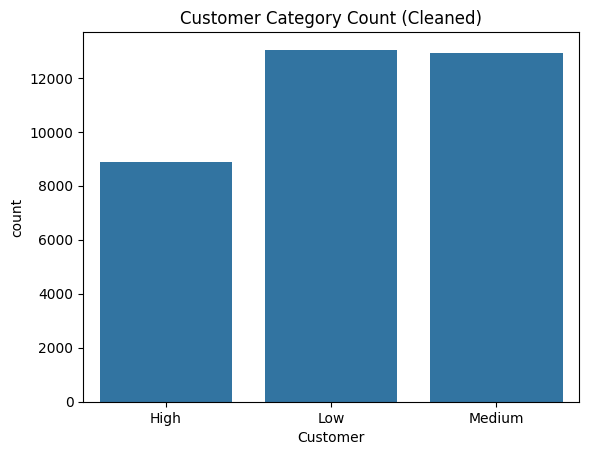

In [32]:
sns.countplot(x="Customer", data=df)
plt.title("Customer Category Count (Cleaned)")

In [34]:
df["Customer"] = df["Customer"].str.strip().str.title()

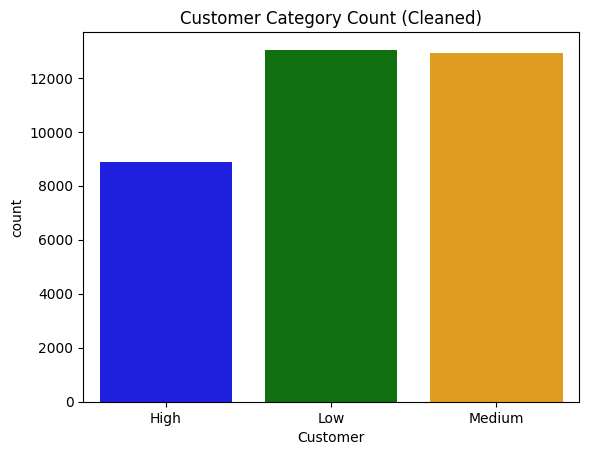

In [39]:
sns.countplot(x="Customer", hue="Customer", data=df, palette=["blue", "green", "orange"])
plt.title("Customer Category Count (Cleaned)");

In [41]:
df["Customer"].value_counts()

Customer
Low       13041
Medium    12926
High       8899
Name: count, dtype: int64

### Findings
#### Majority of the transactions were made by the Low Customer, followed by the Medium and the High.

In [33]:
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price', 'year', 'month', 'month_name',
       'quarter', 'age_group', 'cost', 'revenue', 'profit', 'profit_label'],
      dtype='object')

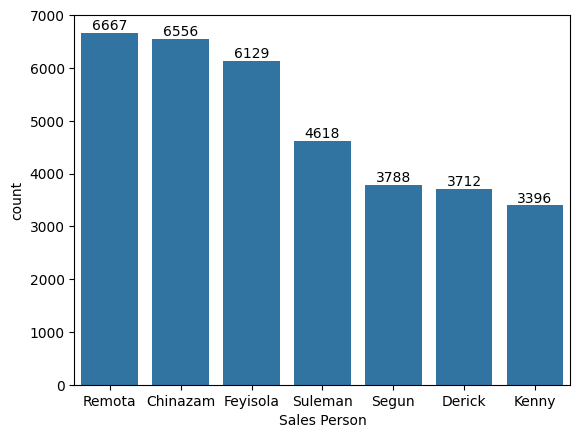

In [108]:
# Sales Person - How many transactions by sales person
ax = sns.countplot(x=df["Sales Person"], data=df, order=df["Sales Person"].value_counts(ascending=False).index)
values = df["Sales Person"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

### Findings

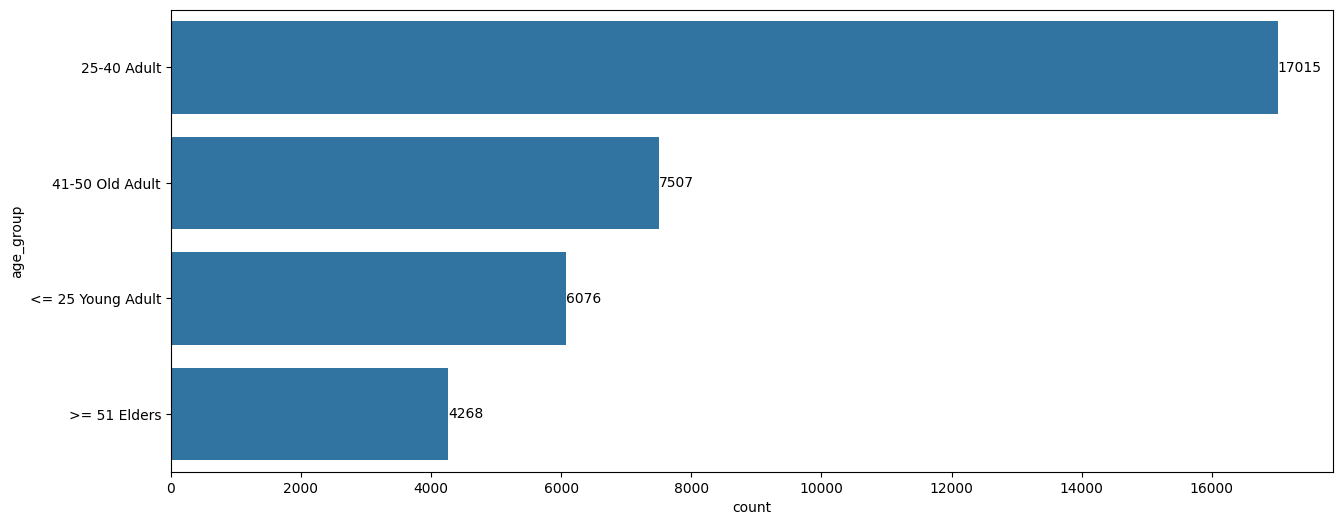

In [86]:
# Total transaction by customer Age Group

plt.figure(figsize=(15, 6))
ax = sns.countplot(y=df["age_group"], data=df, order=df["age_group"].value_counts(ascending=False).index)
values = df["age_group"].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

# Findings

Text(0.5, 1.0, 'Percentage of Transaction by Gender')

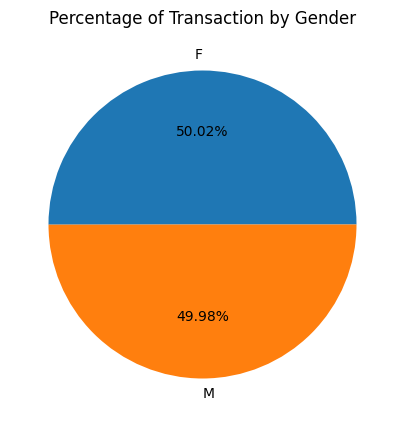

In [92]:
# Total transaction by customer Gender

fig, ax = plt.subplots(figsize=(5 ,5))
count = Counter(df["Customer_Gender"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
ax.set_title("Percentage of Transaction by Gender")

### Findings

State
Lagos        10332
Abuja         6421
Abia          5206
Adamawa       2446
Akwa Ibom     1287
Edo           1229
Anambra       1171
Bauchi        1112
Bayelsa       1092
Benue          869
Name: count, dtype: int64


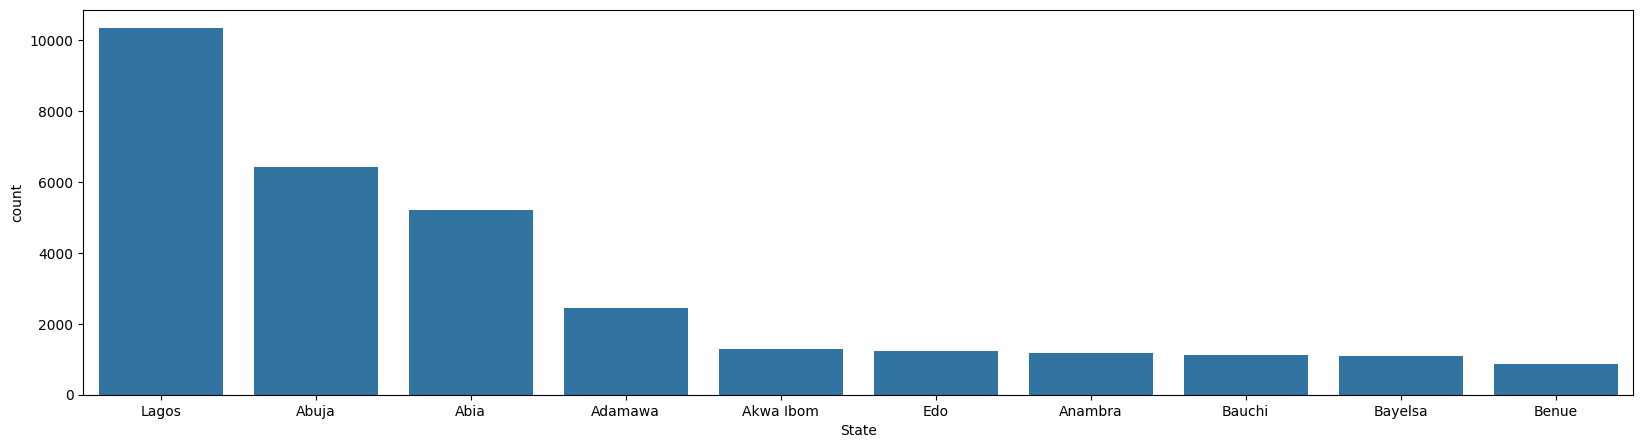

In [101]:
# Total transaction by state
plt.figure(figsize=(20,5))

topten = df["State"].value_counts().head(10)

sns.countplot(x="State", data=df, order=topten.index)
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')
print(topten)

State
Lagos        10332
Abuja         6421
Abia          5206
Adamawa       2446
Akwa Ibom     1287
Edo           1229
Anambra       1171
Bauchi        1112
Bayelsa       1092
Benue          869
Name: count, dtype: int64


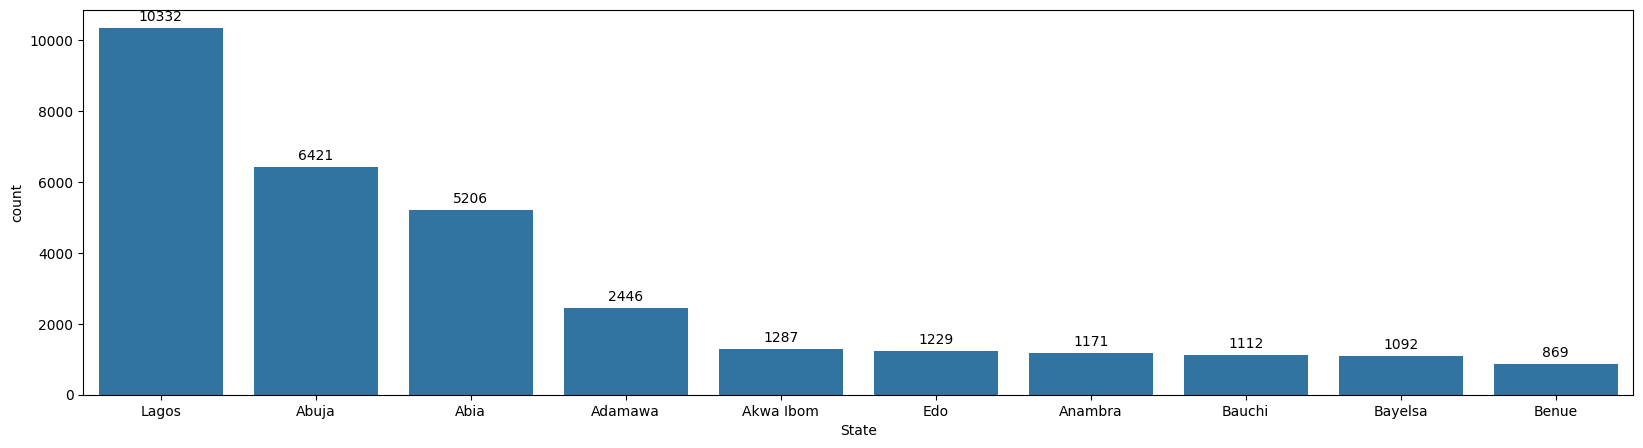

In [102]:
plt.figure(figsize=(20, 5))

# Get top 10 states
topten = df["State"].value_counts().head(10)

# Create the plot and assign it to ax
ax = sns.countplot(x="State", data=df, order=topten.index)

# Add labels above bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

print(topten)

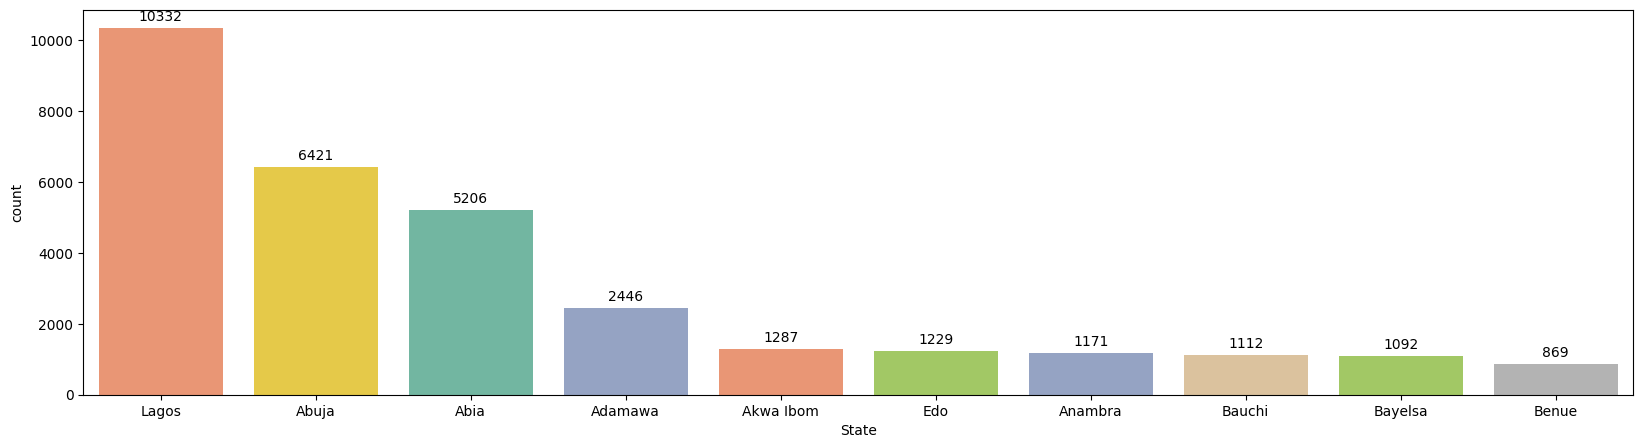

In [106]:
plt.figure(figsize=(20, 5))

# Compute top 10 states
topten = df["State"].value_counts().head(10)

# Use a color palette for different colors
ax = sns.countplot(
    x="State", hue="State",
    data=df,
    order=topten.index,
    palette="Set2")  # Try "Set1", "Paired", "husl", "coolwarm", etc.

# Add value labels above bars
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', padding=3)


# Findings

In [ ]:
# Total transaction by profit or loss

In [ ]:
### - Product_Category
### - Sub_Category
### - Payment Option
### - month_name

Text(0.5, 1.0, 'Percentage of Transaction by Profit or Loss')

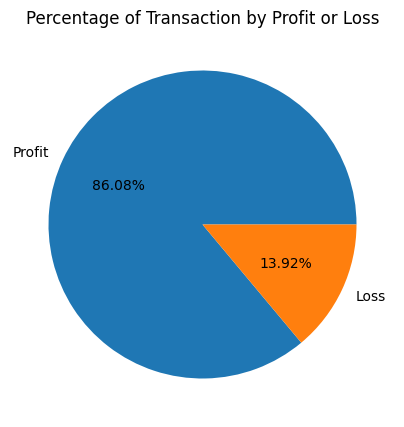

In [109]:
fig, ax = plt.subplots(figsize=(5 ,5))
count = Counter(df["profit_label"])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
ax.set_title("Percentage of Transaction by Profit or Loss")

# Findings

In [113]:
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price', 'year', 'month', 'month_name',
       'quarter', 'age_group', 'cost', 'revenue', 'profit', 'profit_label'],
      dtype='object')

### Numerical data visualization

Text(0.5, 1.0, 'Histogram on Profit')

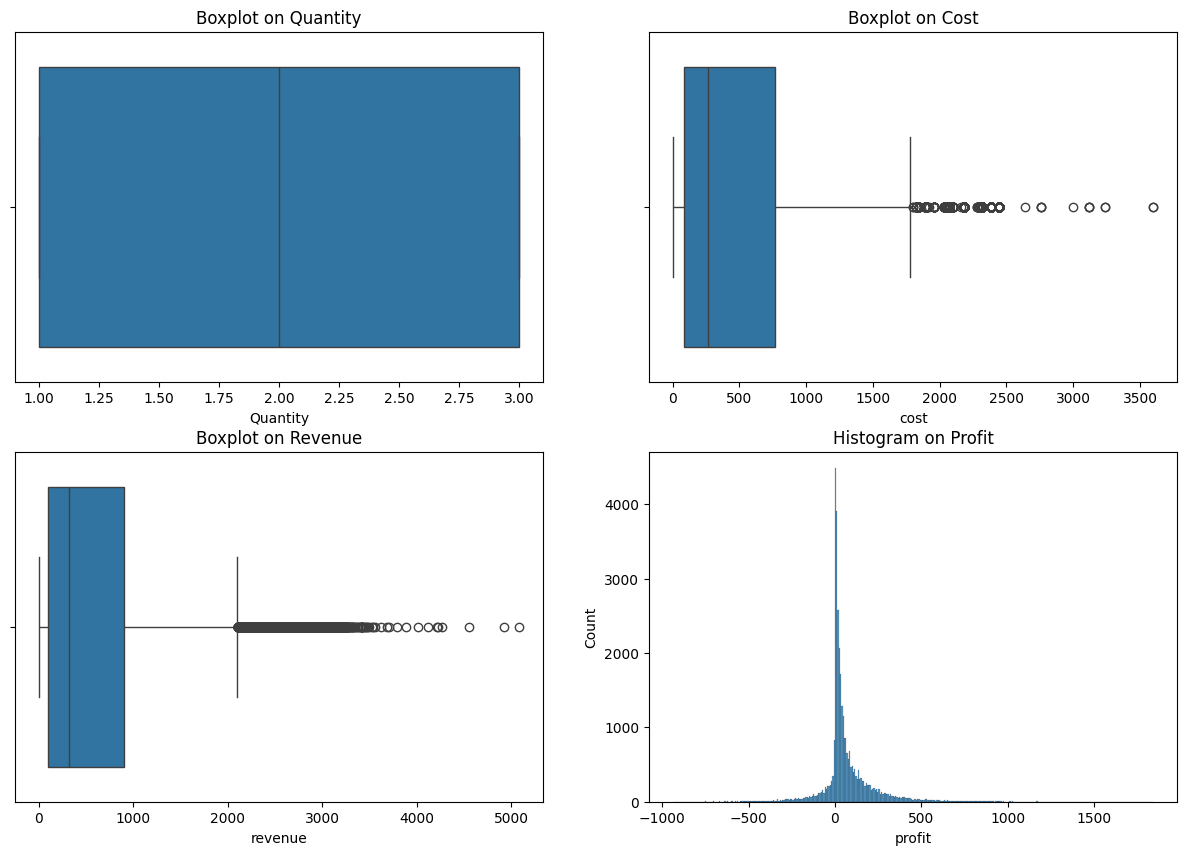

In [115]:
# Quantity, Cost, Revenue and Profit - using subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

sns.boxplot(x="Quantity", data=df, ax=axs[0,0])
axs[0,0].set_title("Boxplot on Quantity")

sns.boxplot(x="cost", data=df, ax=axs[0,1])
axs[0,1].set_title("Boxplot on Cost")

sns.boxplot(x="revenue", data=df, ax=axs[1,0])
axs[1,0].set_title("Boxplot on Revenue")

sns.histplot(x="profit", data=df, ax=axs[1,1])
axs[1,1].set_title("Histogram on Profit")

### Findings

# Bivariate Analysis

### Bivariate analysis involves analysing relationships between two variables

#### - Focus on Profit

In [ ]:
# Categorical columns

In [116]:
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price', 'year', 'month', 'month_name',
       'quarter', 'age_group', 'cost', 'revenue', 'profit', 'profit_label'],
      dtype='object')

Text(0.5, 1.0, 'Total profit by Sub_Category')

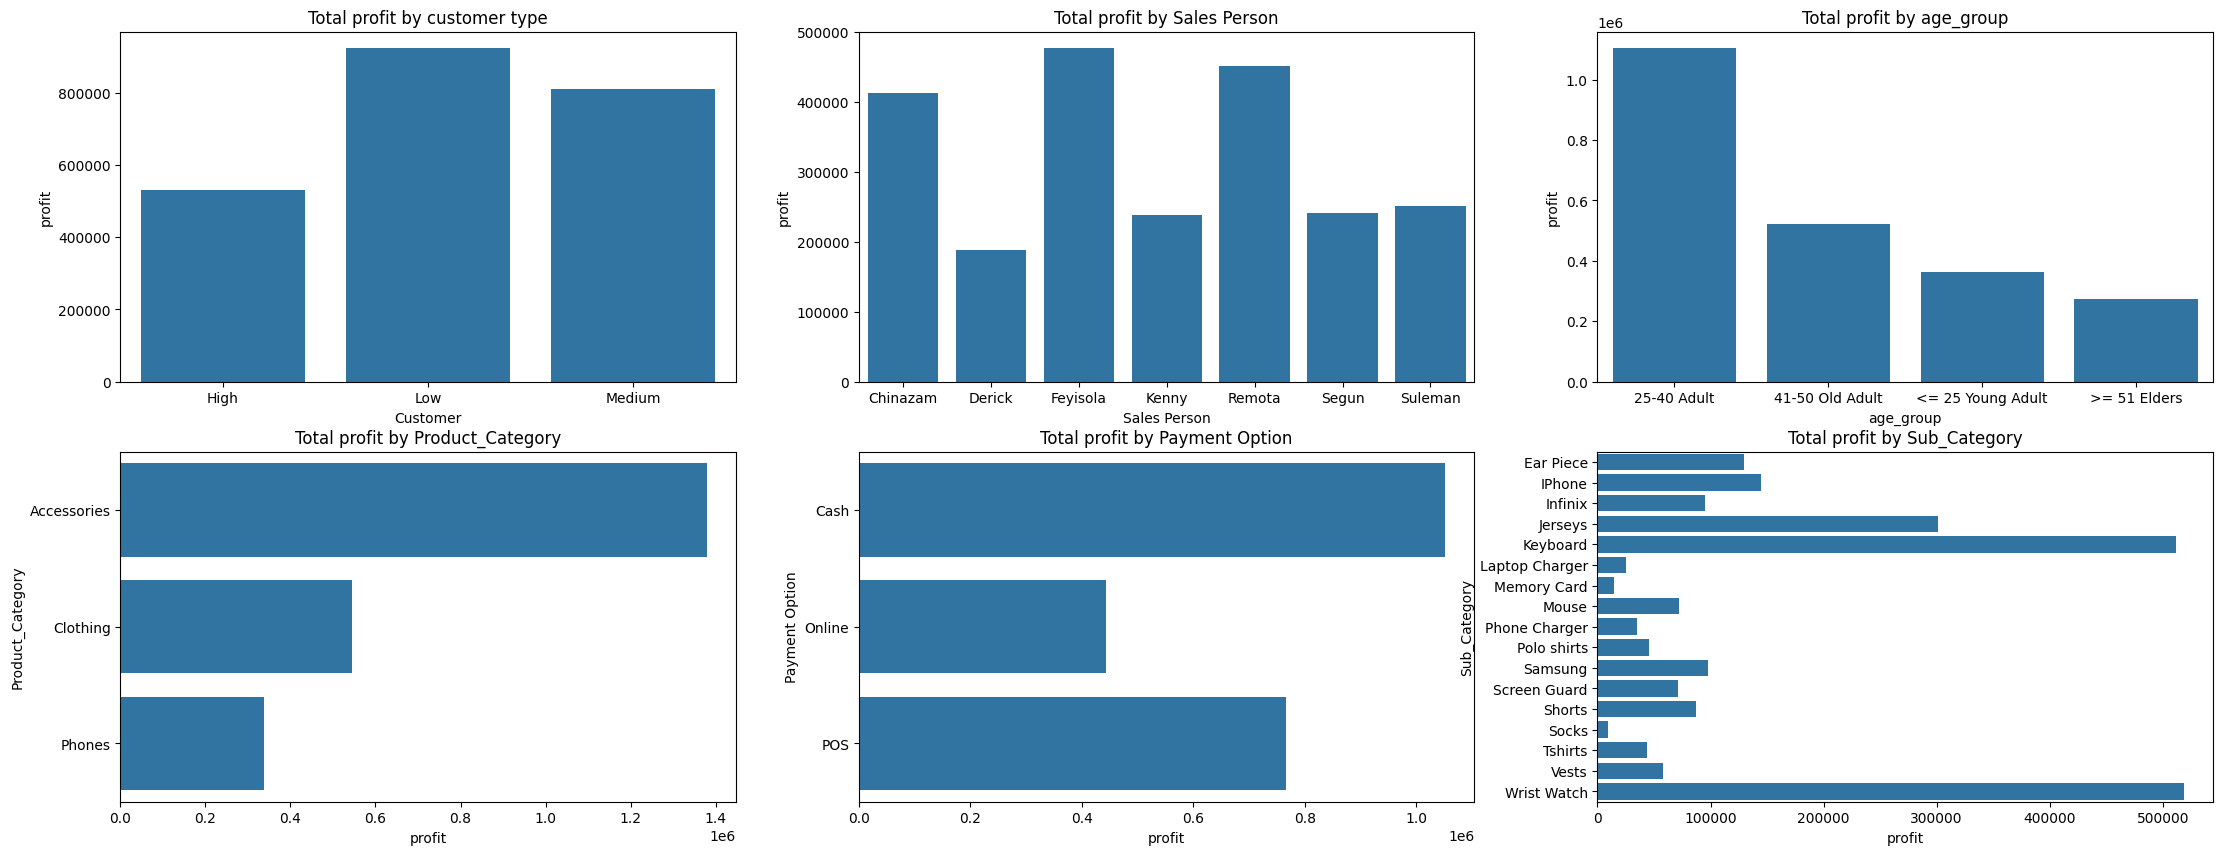

In [128]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(27,10))

cust_prof = df.groupby("Customer") ["profit"].sum().reset_index()
colors = sns.color_palette("tab10", len(cust_prof))
sns.barplot(x="Customer", data=cust_prof, y="profit", ax=axs[0,0])
axs[0,0].set_title("Total profit by customer type")

sp_prof = df.groupby("Sales Person") ["profit"].sum().reset_index()
colors = sns.color_palette("tab10", len(sp_prof))
sns.barplot(x="Sales Person", data=sp_prof, y="profit", ax=axs[0,1])
axs[0,1].set_title("Total profit by Sales Person")

ag_prof = df.groupby("age_group") ["profit"].sum().reset_index()
colors = sns.color_palette("tab10", len(ag_prof))
sns.barplot(x="age_group", data=ag_prof, y="profit", ax=axs[0,2])
axs[0,2].set_title("Total profit by age_group")

pc_prof = df.groupby("Product_Category") ["profit"].sum().reset_index()
colors = sns.color_palette("tab10", len(pc_prof))
sns.barplot(y="Product_Category", data=pc_prof, x="profit", ax=axs[1,0])
axs[1,0].set_title("Total profit by Product_Category")

po_prof = df.groupby("Payment Option") ["profit"].sum().reset_index()
colors = sns.color_palette("tab10", len(po_prof))
sns.barplot(y="Payment Option", data=po_prof, x="profit", ax=axs[1,1])
axs[1,1].set_title("Total profit by Payment Option")

sc_prof = df.groupby("Sub_Category") ["profit"].sum().reset_index()
colors = sns.color_palette("tab10", len(sc_prof))
sns.barplot(y="Sub_Category", data=sc_prof, x="profit", ax=axs[1,2])
axs[1,2].set_title("Total profit by Sub_Category")

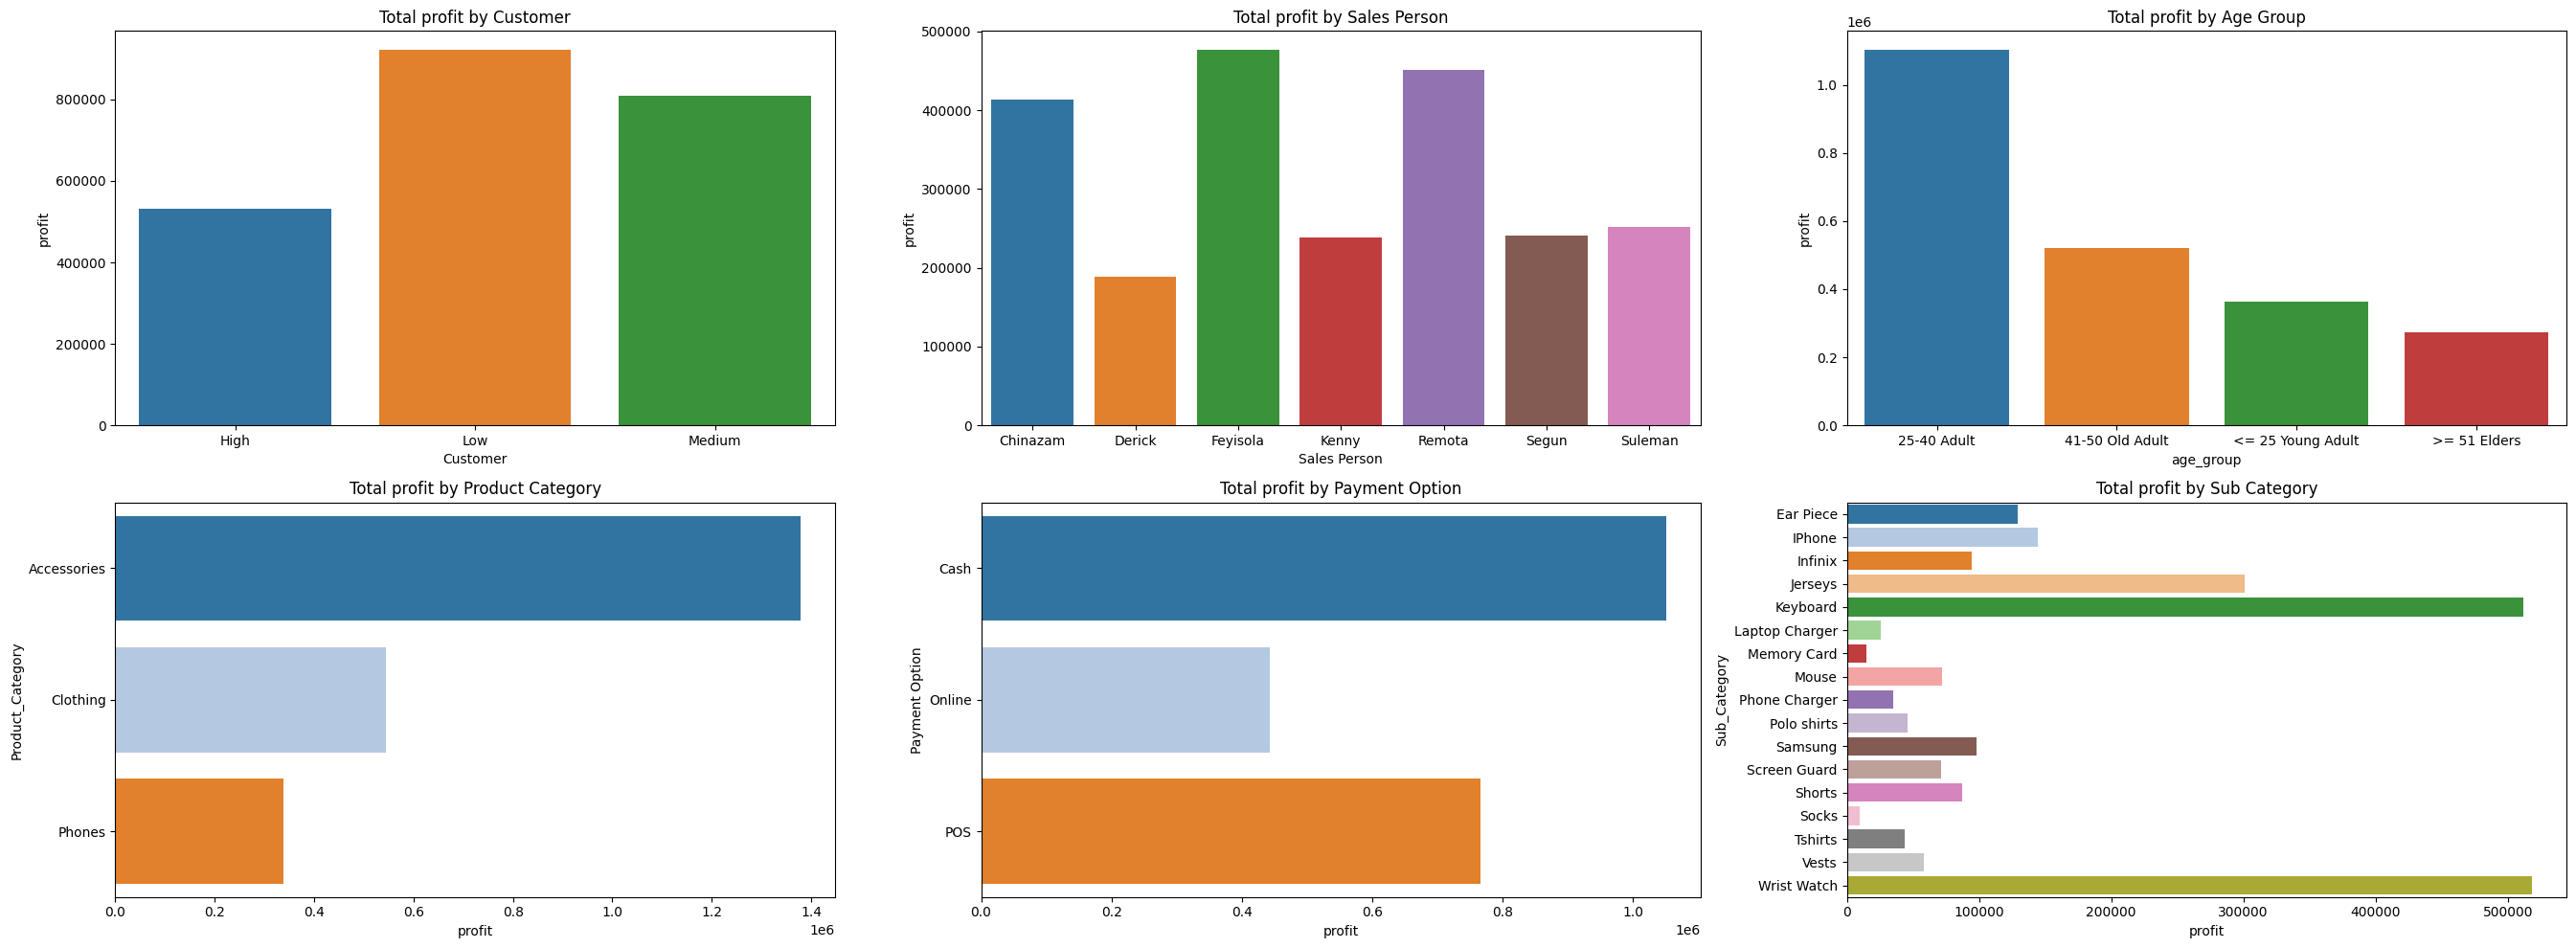

In [132]:

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(27,10))

# 1️⃣ Customer
cust_prof = df.groupby("Customer")["profit"].sum().reset_index()
colors = sns.color_palette("tab10", len(cust_prof))
sns.barplot(x="Customer", y="profit", data=cust_prof, ax=axs[0,0],
    hue="Customer", dodge=False, palette=colors, legend=False)
axs[0,0].set_title("Total profit by Customer")

# 2️⃣ Sales Person
sp_prof = df.groupby("Sales Person")["profit"].sum().reset_index()
colors = sns.color_palette("tab10", len(sp_prof))
sns.barplot(x="Sales Person", y="profit", data=sp_prof, ax=axs[0,1],
    hue="Sales Person", dodge=False, palette=colors, legend=False)
axs[0,1].set_title("Total profit by Sales Person")

# 3️⃣ Age Group
ag_prof = df.groupby("age_group")["profit"].sum().reset_index()
colors = sns.color_palette("tab10", len(ag_prof))
sns.barplot(x="age_group",y="profit",data=ag_prof,ax=axs[0,2],
    hue="age_group",dodge=False,palette=colors,legend=False)
axs[0,2].set_title("Total profit by Age Group")

# 4️⃣ Product Category (horizontal)
pc_prof = df.groupby("Product_Category")["profit"].sum().reset_index()
colors = sns.color_palette("tab20", len(pc_prof))
sns.barplot(y="Product_Category",x="profit",data=pc_prof,ax=axs[1,0],
    hue="Product_Category",dodge=False,palette=colors,legend=False)
axs[1,0].set_title("Total profit by Product Category")

# 5️⃣ Payment Option (horizontal)
po_prof = df.groupby("Payment Option")["profit"].sum().reset_index()
colors = sns.color_palette("tab20", len(po_prof))
sns.barplot(y="Payment Option",x="profit",data=po_prof, ax=axs[1,1],
    hue="Payment Option", dodge=False, palette=colors, legend=False)
axs[1,1].set_title("Total profit by Payment Option")

# 6️⃣ Sub Category (horizontal)
sc_prof = df.groupby("Sub_Category")["profit"].sum().reset_index()
colors = sns.color_palette("tab20", len(sc_prof))
sns.barplot(y="Sub_Category", x="profit", data=sc_prof, ax=axs[1,2],
    hue="Sub_Category",dodge=False, palette=colors,legend=False)
axs[1,2].set_title("Total profit by Sub Category")

plt.tight_layout()

# Findings

In [133]:
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price', 'year', 'month', 'month_name',
       'quarter', 'age_group', 'cost', 'revenue', 'profit', 'profit_label'],
      dtype='object')

Text(0.5, 1.0, 'Customer_Age and Profit')

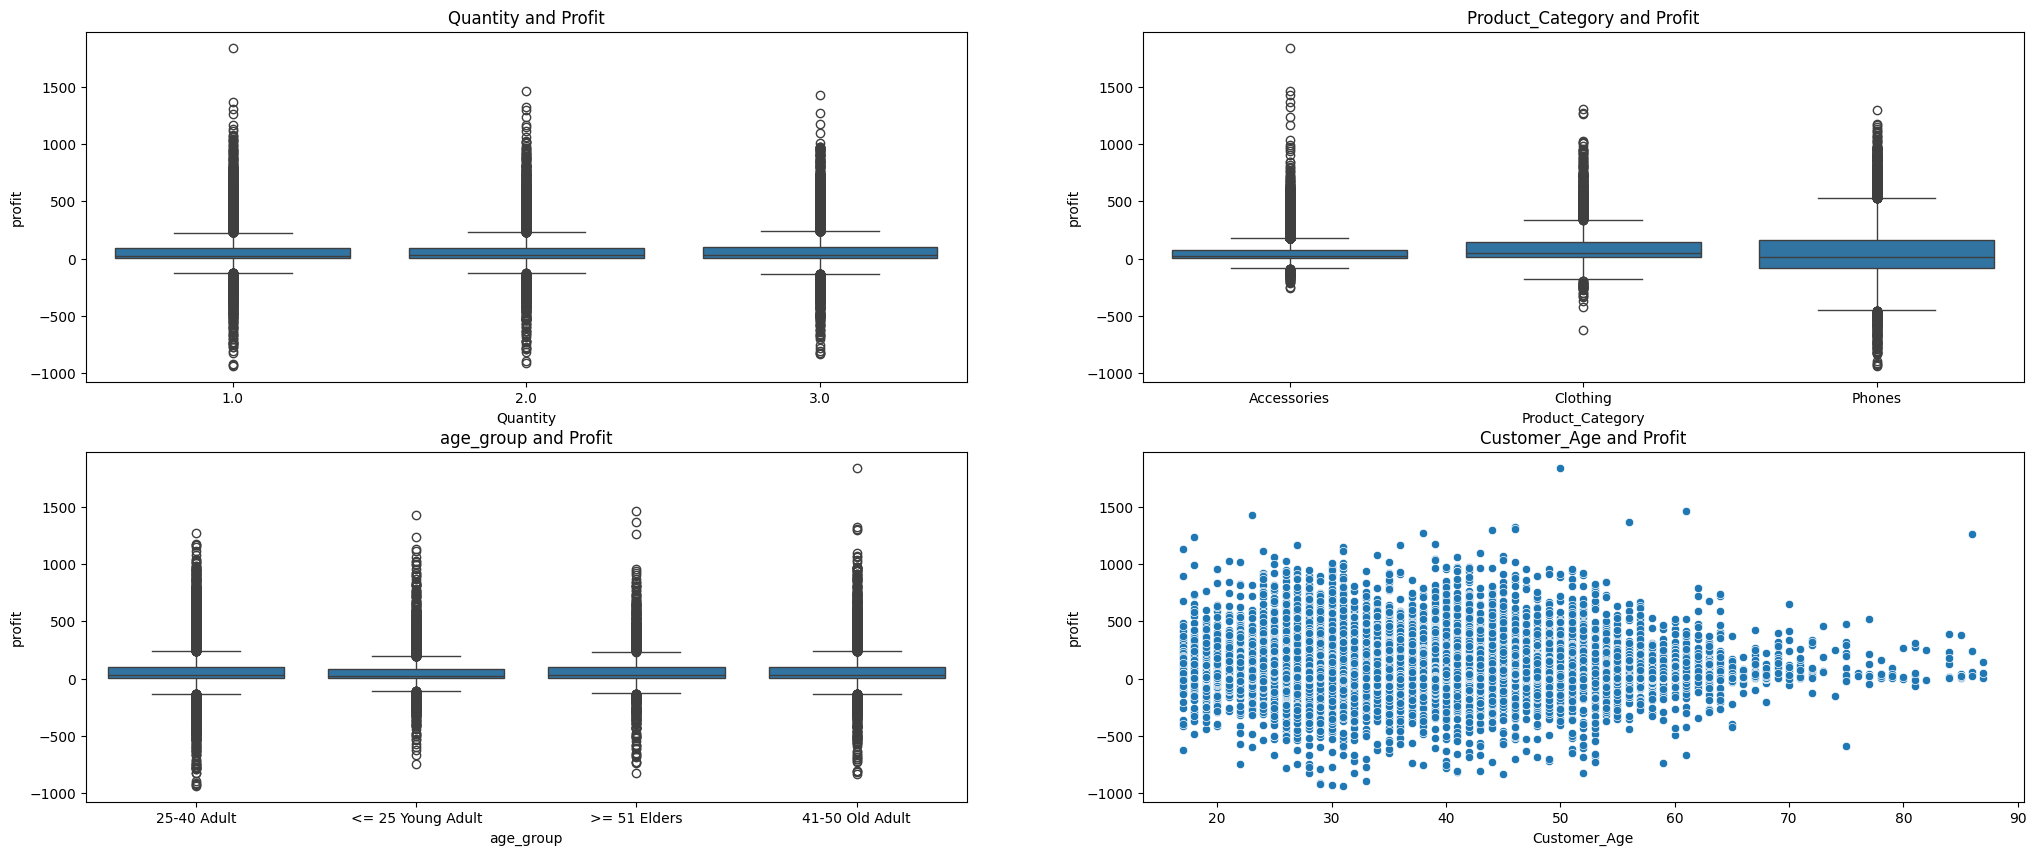

In [139]:
# Numerical
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(25,10))

sns.boxplot(x="Quantity", y="profit", data=df, ax=axs[0,0])
axs[0,0].set_title("Quantity and Profit")

sns.boxplot(x="Product_Category", y="profit", data=df, ax=axs[0,1])
axs[0,1].set_title("Product_Category and Profit")

sns.boxplot(x="age_group", y="profit", data=df, ax=axs[1,0])
axs[1,0].set_title("age_group and Profit")

sns.scatterplot(x="Customer_Age", y="profit", data=df, ax=axs[1,1])
axs[1,1].set_title("Customer_Age and Profit")

### Findings

# Muntivariate Analysis

### Multivariate analysis involves analysing the relationships between three or more variables

In [ ]:
# Product Bategory against Cost, Revenue and Profit

In [140]:
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price', 'year', 'month', 'month_name',
       'quarter', 'age_group', 'cost', 'revenue', 'profit', 'profit_label'],
      dtype='object')

In [145]:
# Product Bategory against Cost, Revenue and Profit
procat = df.groupby("Product_Category")[["cost", "revenue", "profit"]].sum().reset_index()

In [146]:
procat

,Product_Category,cost,revenue,profit
0,Accessories,6041896.06,7420663.12,1378767.06
1,Clothing,2892324.94,3437556.95,545232.01
2,Phones,11148745.02,11486354.63,337609.61


In [147]:
procat1 = pd.melt(procat, id_vars="Product_Category", var_name="Metric", value_name="Total")
procat1

,Product_Category,Metric,Total
0,Accessories,cost,6041896.06
1,Clothing,cost,2892324.94
2,Phones,cost,11148745.02
3,Accessories,revenue,7420663.12
4,Clothing,revenue,3437556.95
5,Phones,revenue,11486354.63
6,Accessories,profit,1378767.06
7,Clothing,profit,545232.01
8,Phones,profit,337609.61


<Axes: xlabel='Product_Category', ylabel='Total'>

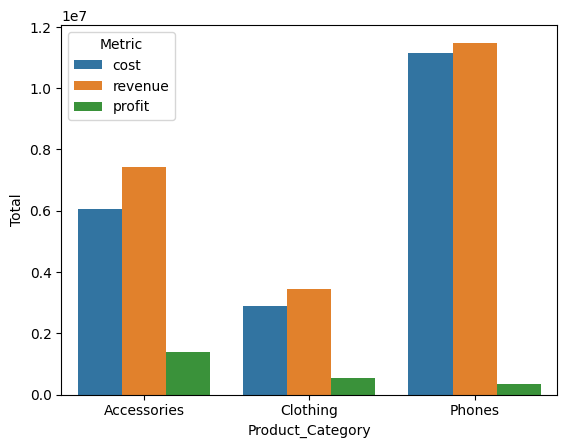

In [150]:
procat = df.groupby("Product_Category")[["cost", "revenue", "profit"]].sum().reset_index()
procat = pd.melt(procat, id_vars="Product_Category", var_name="Metric", value_name="Total")
sns.barplot(data=procat, x="Product_Category", y="Total", hue="Metric")

### Findings

<Axes: xlabel='month', ylabel='profit'>

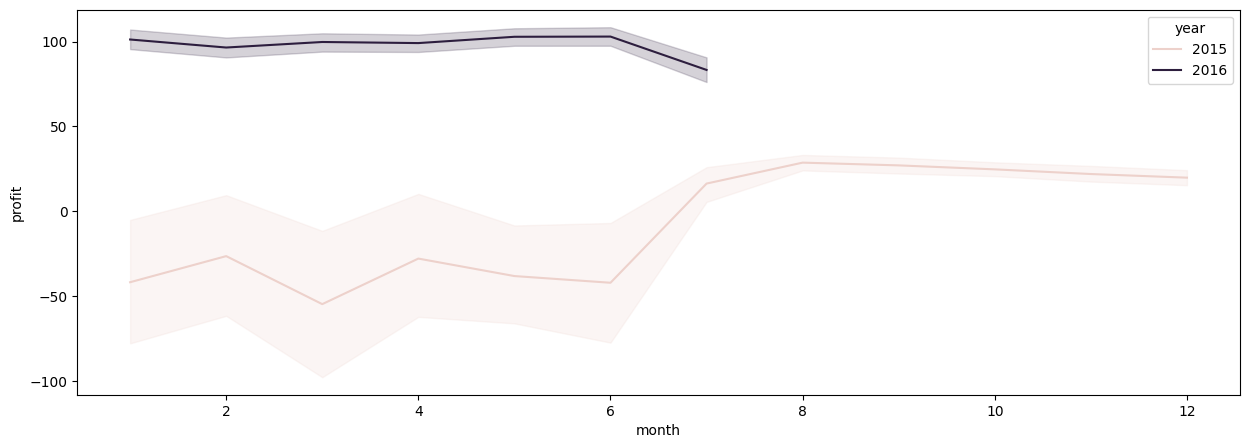

In [151]:
plt.figure(figsize=(15,5))
sns.lineplot(x="month", y="profit", data=df, hue="year")

In [152]:
# Using pivot table
df.pivot_table(values="profit", index="year", columns="month", aggfunc="sum")

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2015,-5778.70,-4079.65,-8163.79,-4945.69,-7801.45,-8690.61,15104.47,65926.24,62172.33,62950.66,54480.9,67448.12
2016,280204.25,263640.18,299777.67,307746.51,356915.59,357549.86,107151.79,NaN,NaN,NaN,NaN,NaN


### Findings

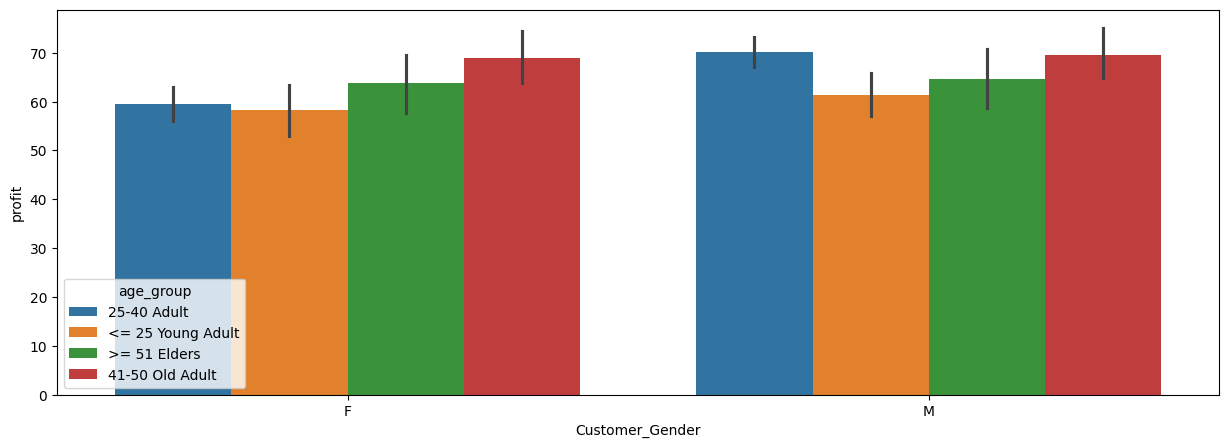

In [154]:
# Customer Gender, Age group and Profit
plt.figure(figsize=(15,5))
sns.barplot(x="Customer_Gender", y="profit", data=df, hue="age_group");

In [156]:
# Creating Pivot Table
df.pivot_table(values="Customer_Gender", index="profit", columns="age_group", aggfunc="sum")

age_group,25-40 Adult,41-50 Old Adult,<= 25 Young Adult,>= 51 Elders
profit,,,,
-937.00,M,NaN,NaN,NaN
-932.00,M,NaN,NaN,NaN
-920.00,M,NaN,NaN,NaN
-916.00,F,NaN,NaN,NaN
-897.00,M,NaN,NaN,NaN
...,...,...,...,...
1323.00,NaN,M,NaN,NaN
1368.00,NaN,NaN,NaN,M
1430.01,NaN,NaN,M,NaN


In [158]:
df.pivot_table(values="Customer_Gender", index="age_group", columns="profit", aggfunc="sum")

profit,-937.00,-932.00,-920.00,-916.00,-897.00,-836.01,-828.99,-828.00,-822.00,-819.00,...,1240.00,1261.00,1274.01,1297.00,1309.00,1323.00,1368.00,1430.01,1459.00,1842.00
age_group,,,,,,,,,,,,,,,,,,,,,
25-40 Adult,M,M,M,F,M,NaN,F,NaN,F,NaN,...,NaN,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41-50 Old Adult,NaN,NaN,NaN,NaN,NaN,F,NaN,NaN,NaN,M,...,NaN,NaN,NaN,M,M,M,NaN,NaN,NaN,M
<= 25 Young Adult,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,M,NaN,NaN,NaN,NaN,NaN,NaN,M,NaN,NaN
>= 51 Elders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,NaN,NaN,...,NaN,M,NaN,NaN,NaN,NaN,M,NaN,F,NaN


### Findings

In [162]:
# Correlation
a = df.corr(numeric_only=True)
a

,Customer_Age,Quantity,Unit_Cost,Unit_Price,year,month,quarter,cost,revenue,profit
Customer_Age,1.000000,0.002801,0.025360,0.026300,0.052688,-0.051610,-0.051932,0.026537,0.027762,0.013914
Quantity,0.002801,1.000000,-0.312514,-0.324109,0.000919,-0.000925,-0.000358,0.008295,0.008418,0.003097
Unit_Cost,0.025360,-0.312514,1.000000,0.981033,-0.073245,-0.018384,-0.024225,0.854908,0.836957,0.171576
Unit_Price,0.026300,-0.324109,0.981033,1.000000,-0.022628,-0.051448,-0.057183,0.832969,0.851034,0.338499
year,0.052688,0.000919,-0.073245,-0.022628,1.000000,-0.810662,-0.812493,-0.084566,-0.025361,0.259750
month,-0.051610,-0.000925,-0.018384,-0.051448,-0.810662,1.000000,0.971628,-0.019345,-0.058461,-0.194321
quarter,-0.051932,-0.000358,-0.024225,-0.057183,-0.812493,0.971628,1.000000,-0.026190,-0.065223,-0.195989
cost,0.026537,0.008295,0.854908,0.832969,-0.084566,-0.019345,-0.026190,1.000000,0.979119,0.201260
revenue,0.027762,0.008418,0.836957,0.851034,-0.025361,-0.058461,-0.065223,0.979119,1.000000,0.396185
profit,0.013914,0.003097,0.171576,0.338499,0.259750,-0.194321,-0.195989,0.201260,0.396185,1.000000


<Axes: >

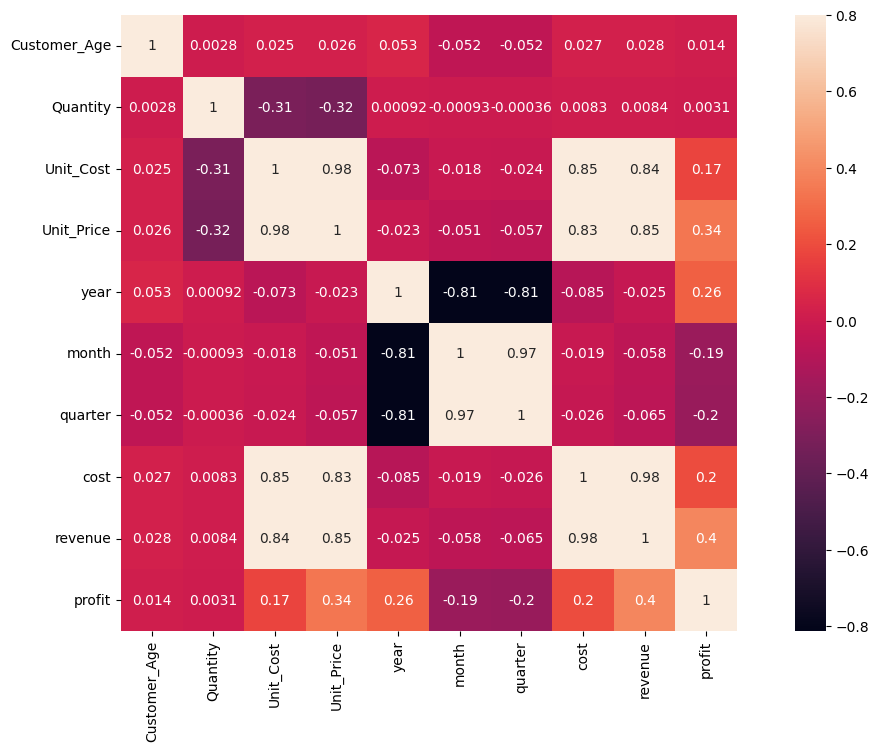

In [166]:
a = df.corr(numeric_only=True)
f, ax = plt.subplots(figsize=(15,8))
sns.heatmap(a, vmax=.8, square=True, annot=True)

### Observations

C:\Users\iheom\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


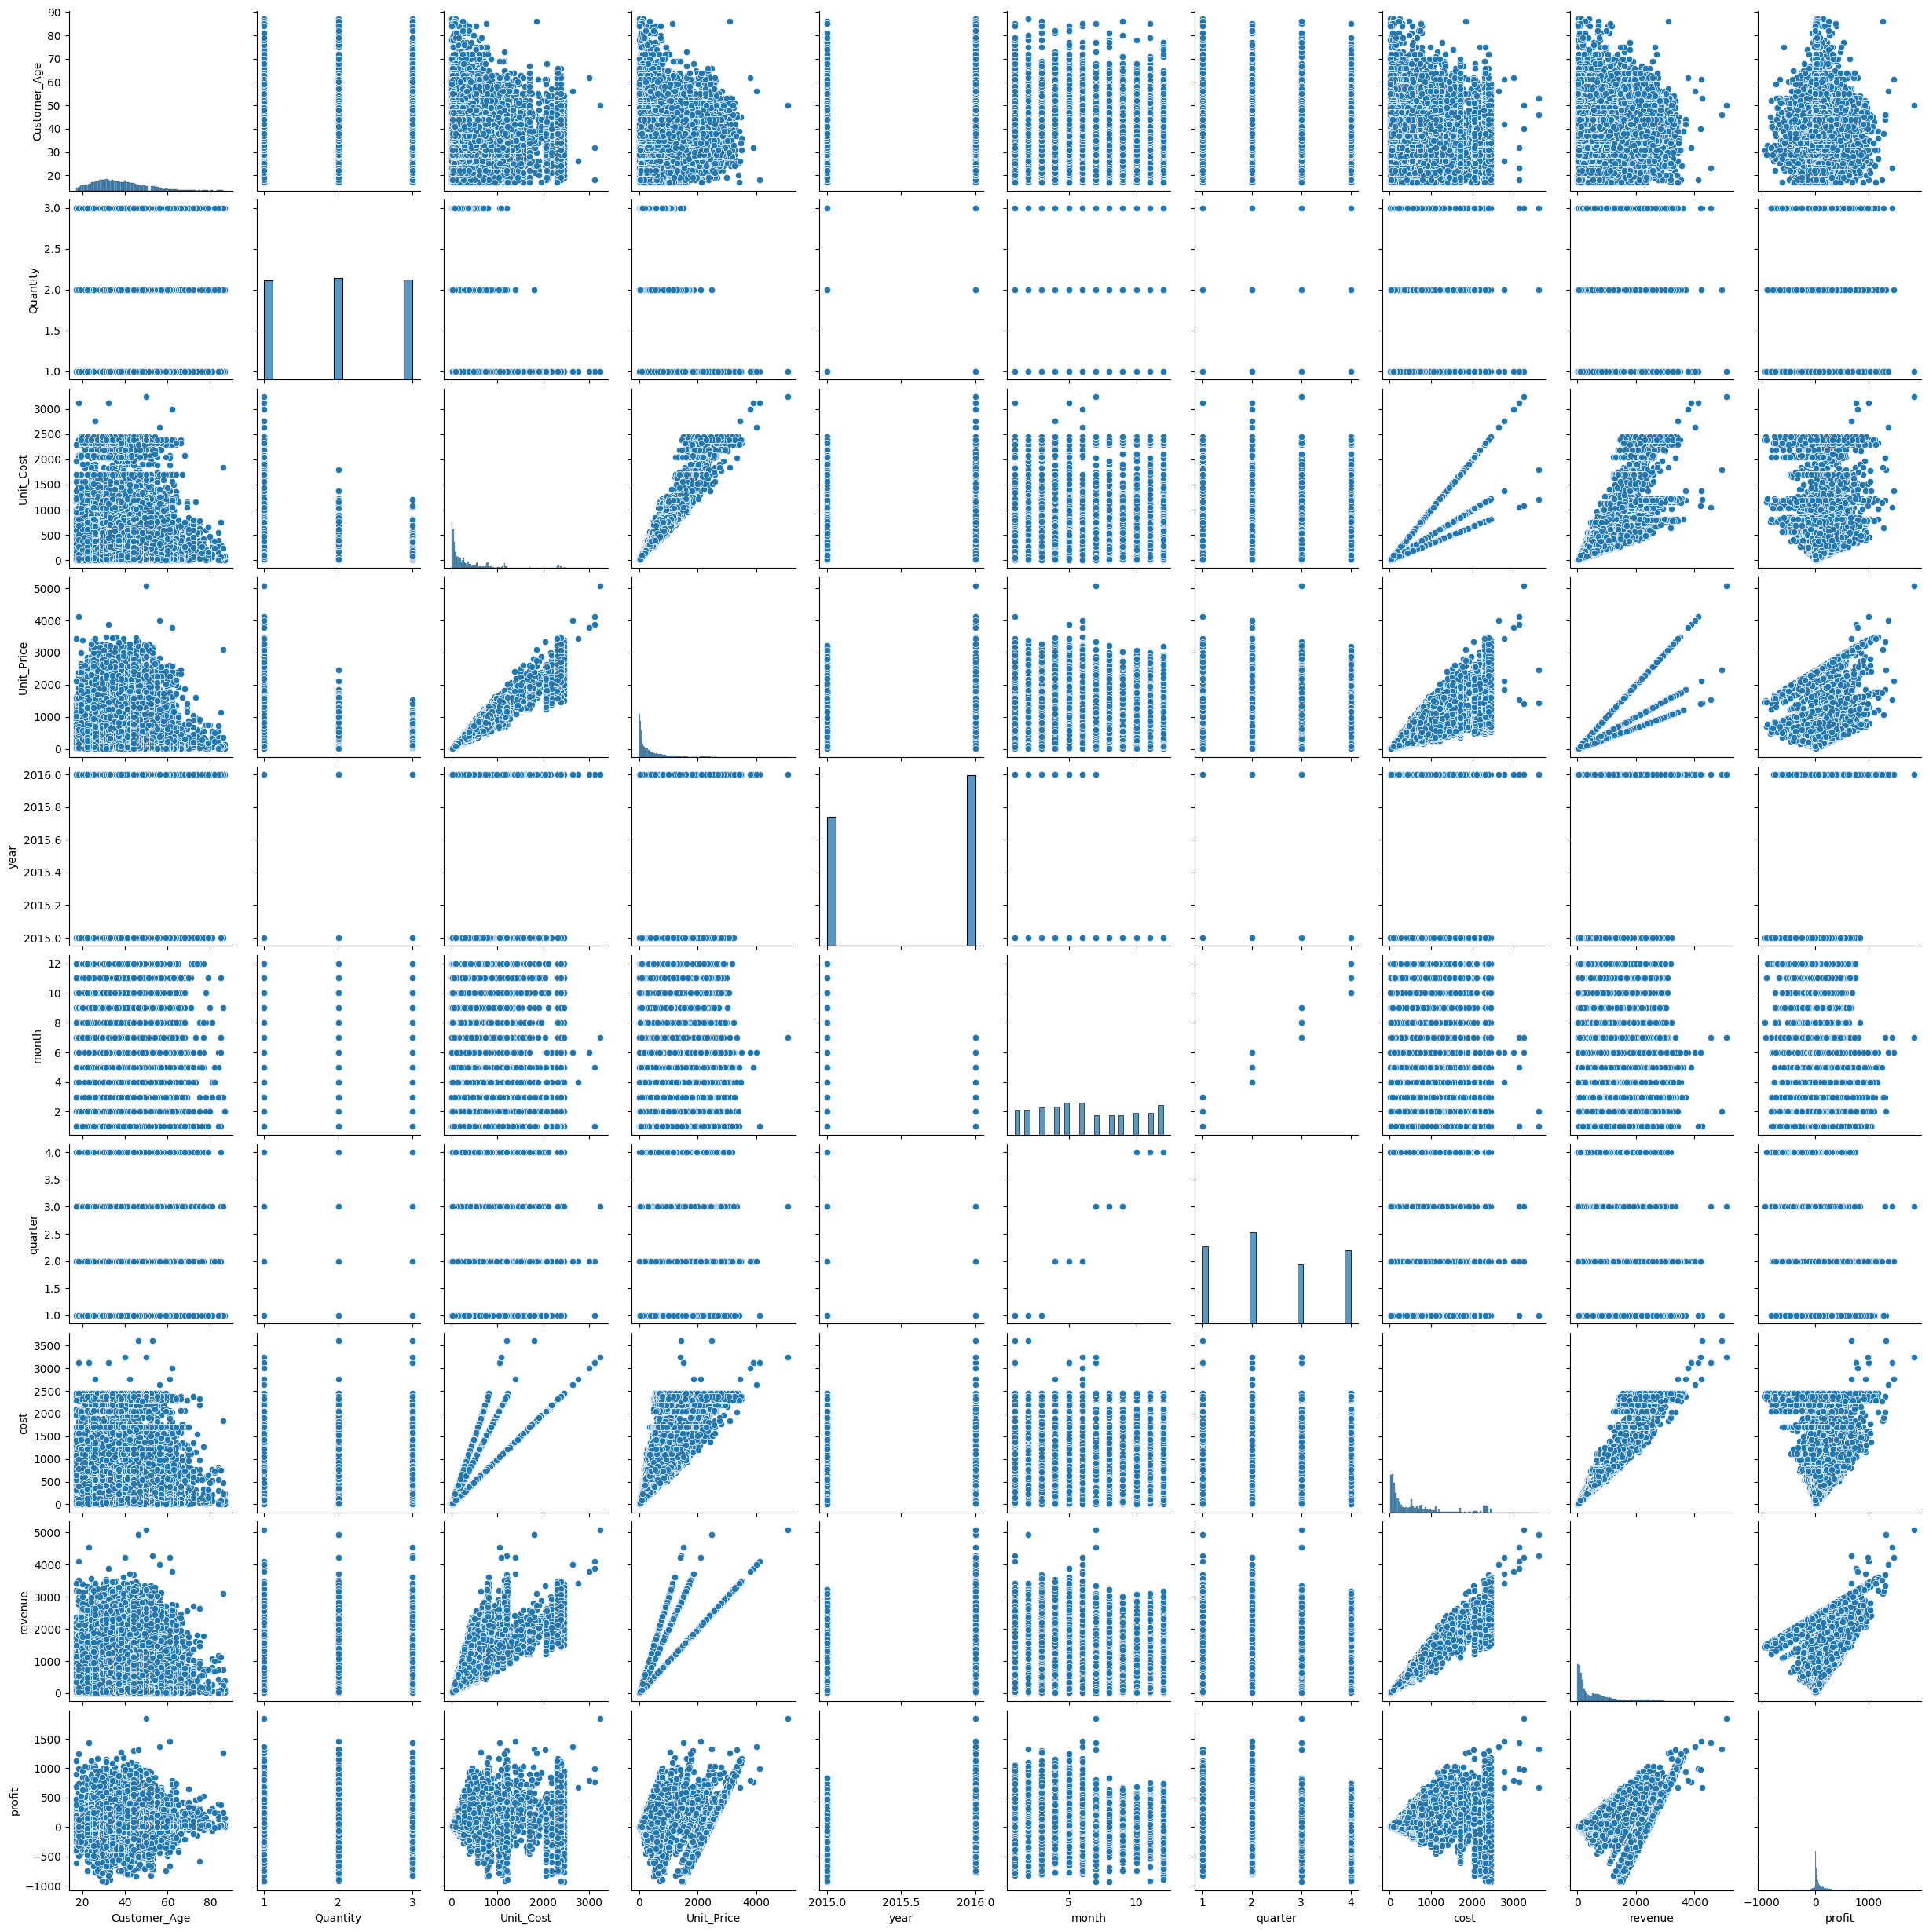

In [168]:
# Pairplots (This plot only numerical columns)
sns.pairplot(df,size=2.5);

### Observations